In [36]:
import pandas as pd
import os
%pylab inline
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
#if os.path.exists("Wallmart_Database.db") : os.remove("Wallmart_Database.db")
import sqlite3
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


Populating the interactive namespace from numpy and matplotlib


/Users/azizmamatov/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'axes', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
!pwd
#%cd
%cd azizmamatov/

/Users
/Users/azizmamatov


### Creating SQLite database out of csv files
Should be done once.
We can then create pd series out of the database by ####pd.read_sql_query('Query;',conn)

In [3]:
'''
df_stores = pd.read_csv('Downloads/Walmart_Data/stores.csv')
df_features = pd.read_csv('Downloads/Walmart_Data/features.csv')
df_train = pd.read_csv('Downloads/Walmart_Data/train.csv')                         
conn = sqlite3.connect('Downloads/Wallmart_Database.db')
df_stores.to_sql('Stores_Table',conn)
df_features.to_sql('Features_Table',conn)
df_train.to_sql('Train_Table',conn)                          
sql_string = 'Select * from Stores_Table'
df_x = pd.read_sql('Select * from Stores_Table', conn)
df_x.head(5)
'''

"\ndf_stores = pd.read_csv('Downloads/Walmart_Data/stores.csv')\ndf_features = pd.read_csv('Downloads/Walmart_Data/features.csv')\ndf_train = pd.read_csv('Downloads/Walmart_Data/train.csv')                         \nconn = sqlite3.connect('Downloads/Wallmart_Database.db')\ndf_stores.to_sql('Stores_Table',conn)\ndf_features.to_sql('Features_Table',conn)\ndf_train.to_sql('Train_Table',conn)                          \nsql_string = 'Select * from Stores_Table'\ndf_x = pd.read_sql('Select * from Stores_Table', conn)\ndf_x.head(5)\n"

### SQL queries and creation of df

In [12]:
conn = sqlite3.connect('Downloads/Wallmart_Database.db')
cur = conn.cursor()
sql_string = 'Select * from Stores_Table Join Features_Table Using(Store);'
df_y = pd.read_sql(sql_string, conn)
df_y.describe()
df_y[df_y["Size"]==df_y["Size"].max()]

/Users/azizmamatov/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,index,Store,Type,Size,index,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
2184,12,13,A,219622,2184,2010-02-05,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.316,0
2185,12,13,A,219622,2185,2010-02-12,33.16,2.671,NaN,NaN,NaN,NaN,NaN,126.496258,8.316,1
2186,12,13,A,219622,2186,2010-02-19,35.70,2.654,NaN,NaN,NaN,NaN,NaN,126.526286,8.316,0
2187,12,13,A,219622,2187,2010-02-26,29.98,2.667,NaN,NaN,NaN,NaN,NaN,126.552286,8.316,0
2188,12,13,A,219622,2188,2010-03-05,40.65,2.681,NaN,NaN,NaN,NaN,NaN,126.578286,8.316,0
2189,12,13,A,219622,2189,2010-03-12,37.62,2.733,NaN,NaN,NaN,NaN,NaN,126.604286,8.316,0
2190,12,13,A,219622,2190,2010-03-19,42.49,2.782,NaN,NaN,NaN,NaN,NaN,126.606645,8.316,0
2191,12,13,A,219622,2191,2010-03-26,41.48,2.819,NaN,NaN,NaN,NaN,NaN,126.605064,8.316,0
2192,12,13,A,219622,2192,2010-04-02,42.15,2.842,NaN,NaN,NaN,NaN,NaN,126.603484,8.107,0
2193,12,13,A,219622,2193,2010-04-09,38.97,2.877,NaN,NaN,NaN,NaN,NaN,126.601903,8.107,0


In [ ]:
conn = sqlite3.connect('Downloads/Wallmart_Database.db')
cur = conn.cursor()
cur.execute("SELECT * FROM Stores_Table order by(Store) desc limit 5;").fetchall() #query on getting store information
cur.execute("SELECT count(Store) FROM Train_Table;").fetchall() #number of records from Train_table
#ordered by size and limited


### Number of records from joint Stores_Table and Features_Table

In [ ]:
pd.read_sql_query('select count(*) from (Select * from Stores_Table Join Features_Table Using(Store));',conn)

### Pulling df out of SQL DB
dept is not correct for some reason

In [13]:
#df = pd.read_sql_query('Select * from Stores_Table Join Features_Table Using(Store);',conn)
df = pd.read_sql_query('Select * from Train_Table;',conn)
print df.dtypes, df.describe()

index             int64
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday         int64
dtype: object                index          Store           Dept   Weekly_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean   210784.500000      22.200546      44.260317   15981.258123   
std    121696.920828      12.785297      30.492054   22711.183519   
min         0.000000       1.000000       1.000000   -4988.940000   
25%    105392.250000      11.000000      18.000000    2079.650000   
50%    210784.500000      22.000000      37.000000    7612.030000   
75%    316176.750000      33.000000      74.000000   20205.852500   
max    421569.000000      45.000000      99.000000  693099.360000   

           IsHoliday  
count  421570.000000  
mean        0.070358  
std         0.255750  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


### Creating df out of CSV file
Converting 'Date' column to date type for time series purposes

In [14]:
df_train = pd.read_csv('Downloads/Walmart_Data/train.csv')                         
df.tail(5)
df['Date'] = pd.to_datetime(df['Date'])
print df.describe(), df.dtypes
df.tail(5)

               index          Store           Dept   Weekly_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean   210784.500000      22.200546      44.260317   15981.258123   
std    121696.920828      12.785297      30.492054   22711.183519   
min         0.000000       1.000000       1.000000   -4988.940000   
25%    105392.250000      11.000000      18.000000    2079.650000   
50%    210784.500000      22.000000      37.000000    7612.030000   
75%    316176.750000      33.000000      74.000000   20205.852500   
max    421569.000000      45.000000      99.000000  693099.360000   

           IsHoliday  
count  421570.000000  
mean        0.070358  
std         0.255750  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000   index                    int64
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday       

,index,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,421565,45,98,2012-09-28,508.37,0
421566,421566,45,98,2012-10-05,628.10,0
421567,421567,45,98,2012-10-12,1061.02,0
421568,421568,45,98,2012-10-19,760.01,0
421569,421569,45,98,2012-10-26,1076.80,0


In [15]:
#df[df['Store']==df['Weekly_Sales'].idxmax()]
df.ix[df['Weekly_Sales'].idxmax()]

index                         95373
Store                            10
Dept                             72
Date            2010-11-26 00:00:00
Weekly_Sales                 693099
IsHoliday                         1
Name: 95373, dtype: object

### Adding Shop and Type data to Train table
Can't join tables fully as it becomes too large (3 bln rows)

In [16]:
conn = sqlite3.connect('Downloads/Wallmart_Database.db')
cur = conn.cursor()
df_type = pd.read_sql_query('Select * from Train_Table Join (select (Type), (Store) from Stores_Table) Using(Store);',conn)


In [17]:
df_type['Date'] = pd.to_datetime(df_type['Date']) # for time series we need to convert the object type to date type
print df_type.describe(), df_type.head(5), df_type.dtypes

               index          Store           Dept   Weekly_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean   210784.500000      22.200546      44.260317   15981.258123   
std    121696.920828      12.785297      30.492054   22711.183519   
min         0.000000       1.000000       1.000000   -4988.940000   
25%    105392.250000      11.000000      18.000000    2079.650000   
50%    210784.500000      22.000000      37.000000    7612.030000   
75%    316176.750000      33.000000      74.000000   20205.852500   
max    421569.000000      45.000000      99.000000  693099.360000   

           IsHoliday  
count  421570.000000  
mean        0.070358  
std         0.255750  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000      index  Store  Dept       Date  Weekly_Sales  IsHoliday Type
0      0      1     1 2010-02-05      24924.50          0    A
1      1      1     1 2010-02-12      46039.4

### Setting date as index for time series purposes
Alternatively, it could be directly made when csv file was uploaded to pd. 
data = pd.read_csv('File.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)


In [18]:
#df_type.set_index('Date', inplace=True)
df_type2 = df_type.set_index(pd.DatetimeIndex(df_type['Date']))

df_type2.index


DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', length=421570, freq=None)

In [19]:
#df_type2['2010'][df_type2['Store']==1] not working takes too much time
df_type2['2010'].mean() #means accross the df belonging to 2010 year
tf= df_type2[['Store', 'Weekly_Sales']] #creating timeseries df with store and 
tf.head(5)

,Store,Weekly_Sales
2010-02-05,1,24924.50
2010-02-12,1,46039.49
2010-02-19,1,41595.55
2010-02-26,1,19403.54
2010-03-05,1,21827.90


### Determining stationary series
Apparently according to https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/ it is important to determine if the series are stationary (mean, variance reamin constant over time). Most TS models work on stationary models.

In [ ]:
plt.plot(tf) #too much data, need to see one shop only

In [ ]:
tf_store1 = tf['Weekly_Sales'][tf['Store']==1] #only sales data for store No.1 but for many departments,
#so they all should be grouped
plt.plot(tf_store1) #only for store no 1, showing too many lines for some reason

In [ ]:
tf_store1.describe()
tf_store1.plot.line(x=None, y=None)

In [ ]:
tf_store1.head(5)

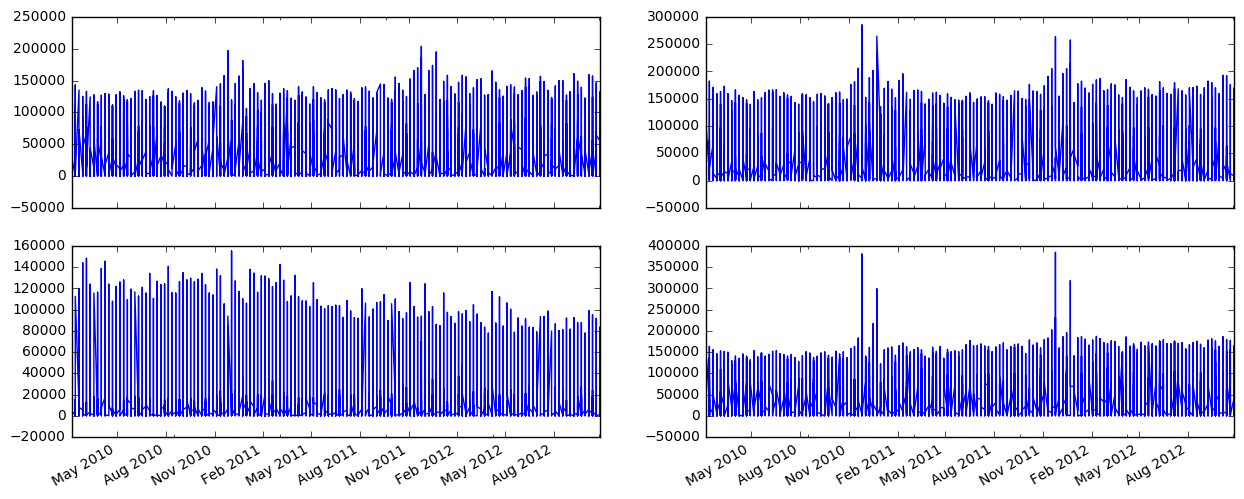

In [20]:
#plotting several plots to see if 
fig, axes = plt.subplots(nrows=2, ncols=2, sharex = True)
tf['Weekly_Sales'][tf['Store']==1].plot.line(ax=axes[0,0])
tf['Weekly_Sales'][tf['Store']==2].plot.line(ax=axes[0,1])
tf['Weekly_Sales'][tf['Store']==3].plot.line(ax=axes[1,0])
tf['Weekly_Sales'][tf['Store']==4].plot.line(ax=axes[1,1])

### Ducker - Fuller test for stationarity
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [ ]:
test_stationarity(tf_store1)
# this didn't work as even thogh the store is only one but it has 99 department data which should be summarized.

### Uploading new table to Database to have a better timeseries data
It is a good idea to have a time series based data in the database. We should also produce a df with sales grouped by stores to avoid all these departments

In [22]:
df_type2.head(5)

,index,Store,Dept,Date,Weekly_Sales,IsHoliday,Type
2010-02-05,0,1,1,2010-02-05,24924.50,0,A
2010-02-12,1,1,1,2010-02-12,46039.49,1,A
2010-02-19,2,1,1,2010-02-19,41595.55,0,A
2010-02-26,3,1,1,2010-02-26,19403.54,0,A
2010-03-05,4,1,1,2010-03-05,21827.90,0,A


In [ ]:
# it can only be executed once, as the Table already exists
#df_type2.to_sql('TS_Train_Table',conn)


In [23]:
df_salesstores = pd.read_sql_query('Select (Store), (Date), sum(Weekly_Sales) from TS_Train_Table group by (Date),(Store);',conn)


In [24]:
print df_salesstores.head(5), df_salesstores.dtypes, df_salesstores.describe

   Store                 Date  sum(Weekly_Sales)
0      1  2010-02-05 00:00:00         1643690.90
1      2  2010-02-05 00:00:00         2136989.46
2      3  2010-02-05 00:00:00          461622.22
3      4  2010-02-05 00:00:00         2135143.87
4      5  2010-02-05 00:00:00          317173.10 Store                  int64
Date                  object
sum(Weekly_Sales)    float64
dtype: object <bound method DataFrame.describe of       Store                 Date  sum(Weekly_Sales)
0         1  2010-02-05 00:00:00         1643690.90
1         2  2010-02-05 00:00:00         2136989.46
2         3  2010-02-05 00:00:00          461622.22
3         4  2010-02-05 00:00:00         2135143.87
4         5  2010-02-05 00:00:00          317173.10
5         6  2010-02-05 00:00:00         1652635.10
6         7  2010-02-05 00:00:00          496725.44
7         8  2010-02-05 00:00:00         1004137.09
8         9  2010-02-05 00:00:00          549505.55
9        10  2010-02-05 00:00:00         2193048.

In [25]:
#transforming data type from int64 to datetime
df_salesstores['Date'] = pd.to_datetime(df_salesstores['Date'])

In [26]:
#setting up date as index for time series purposes
df_salesstore = df_salesstores.set_index(pd.DatetimeIndex(df_salesstores['Date']))
print df_salesstore.index, df_salesstore.head(5)

DatetimeIndex(['2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
               '2010-02-05', '2010-02-05', '2010-02-05', '2010-02-05',
               '2010-02-05', '2010-02-05',
               ...
               '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26',
               '2012-10-26', '2012-10-26', '2012-10-26', '2012-10-26',
               '2012-10-26', '2012-10-26'],
              dtype='datetime64[ns]', length=6435, freq=None)             Store       Date  sum(Weekly_Sales)
2010-02-05      1 2010-02-05         1643690.90
2010-02-05      2 2010-02-05         2136989.46
2010-02-05      3 2010-02-05          461622.22
2010-02-05      4 2010-02-05         2135143.87
2010-02-05      5 2010-02-05          317173.10


In [27]:
# preparing timeseries df for Ducker - Fuller test
ts_store = df_salesstore['sum(Weekly_Sales)'][df_salesstore['Store']==1]
ts_store.head(5)

2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
Name: sum(Weekly_Sales), dtype: float64

### Ducker - Fuller test on processed data
It looks like the the time series are stationary and as such are subject to time series modelling. Null-theory in this analysis is that the data is not stationary, and as our test stat is around 5, it means that we can reject the null-theory.
If time series were stationary, there are certain techniques to make it stationary - https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/


/Users/azizmamatov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/azizmamatov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


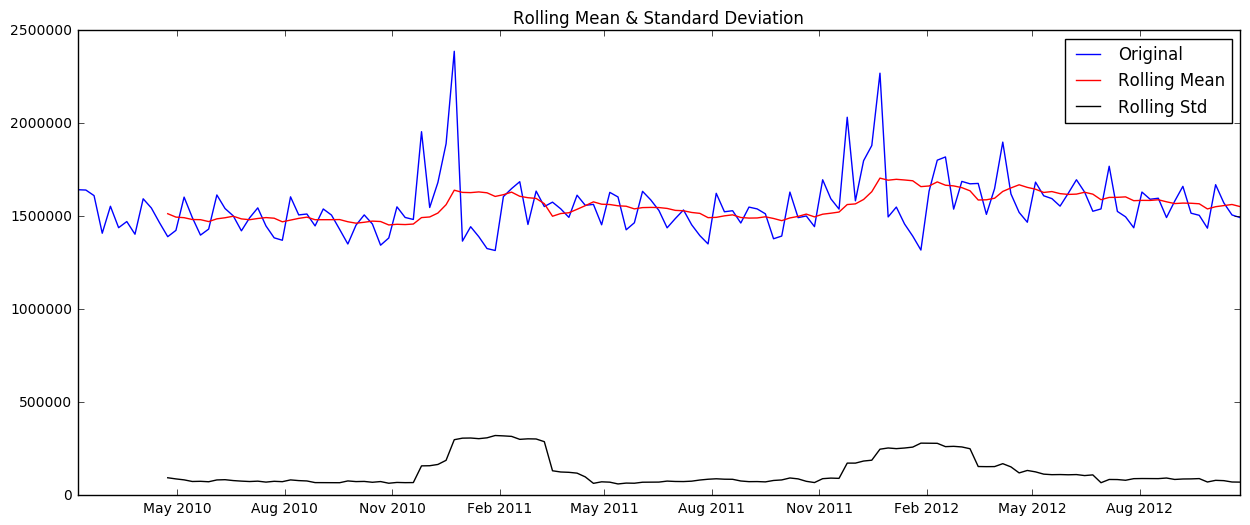

Results of Dickey-Fuller Test:
Test Statistic                  -5.102186
p-value                          0.000014
#Lags Used                       4.000000
Number of Observations Used    138.000000
Critical Value (5%)             -2.882722
Critical Value (1%)             -3.478648
Critical Value (10%)            -2.578065
dtype: float64


In [28]:
# function to test stationarity
test_stationarity(ts_store)


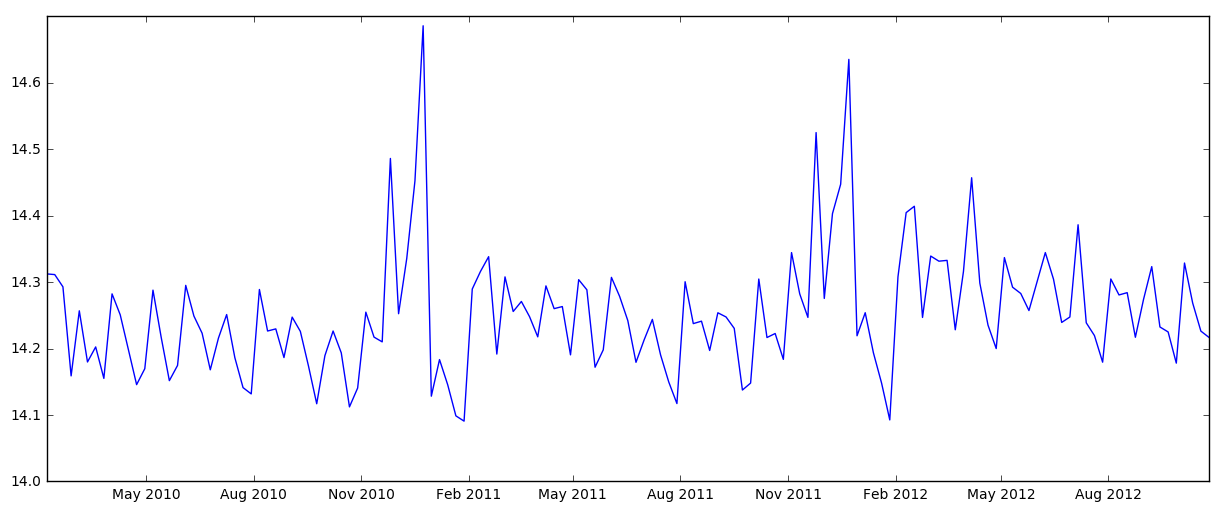

In [29]:
#log transforming the data to reduce the trend and to use in future analysis
ts_log = np.log(ts_store)
plt.plot(ts_log)


In [ ]:
# One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, 
#we take the difference of the observation at a particular instant with that at the previous instant. 
#This mostly works well in improving stationarity. 
#First order differencing can be done in Pandas as:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

### Decomposing
In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

/Users/azizmamatov/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


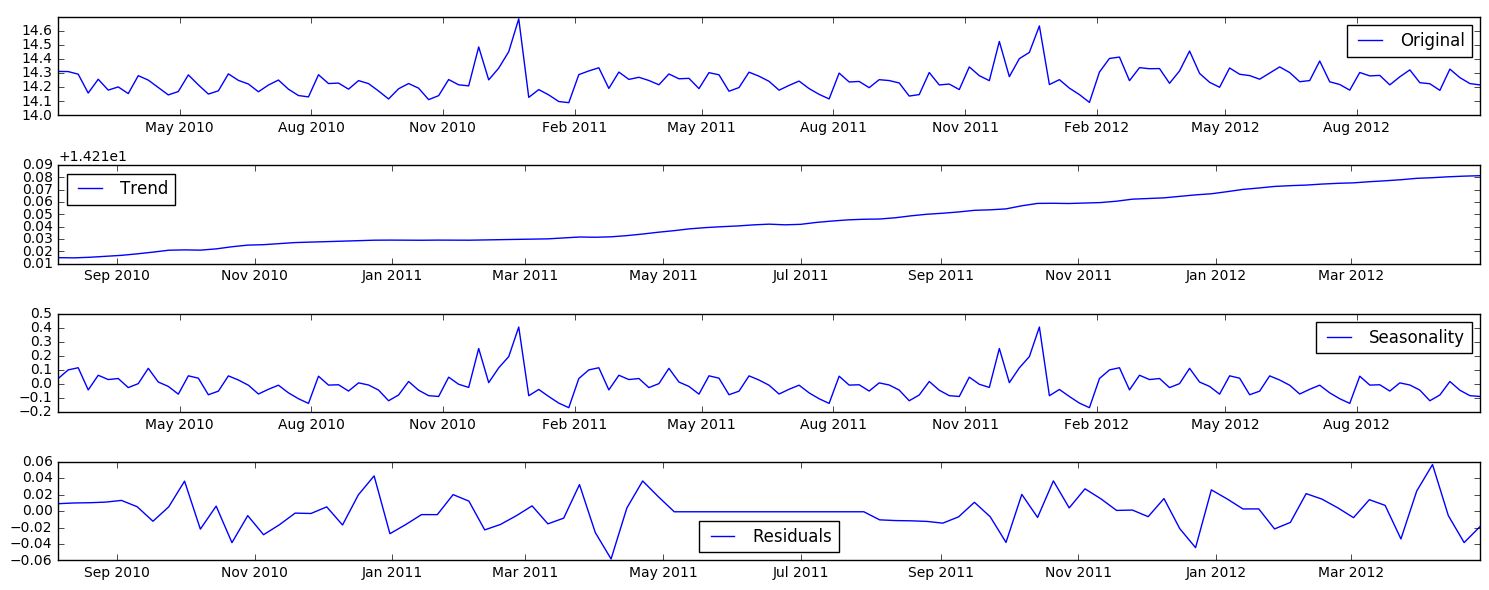

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/Users/azizmamatov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/azizmamatov/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


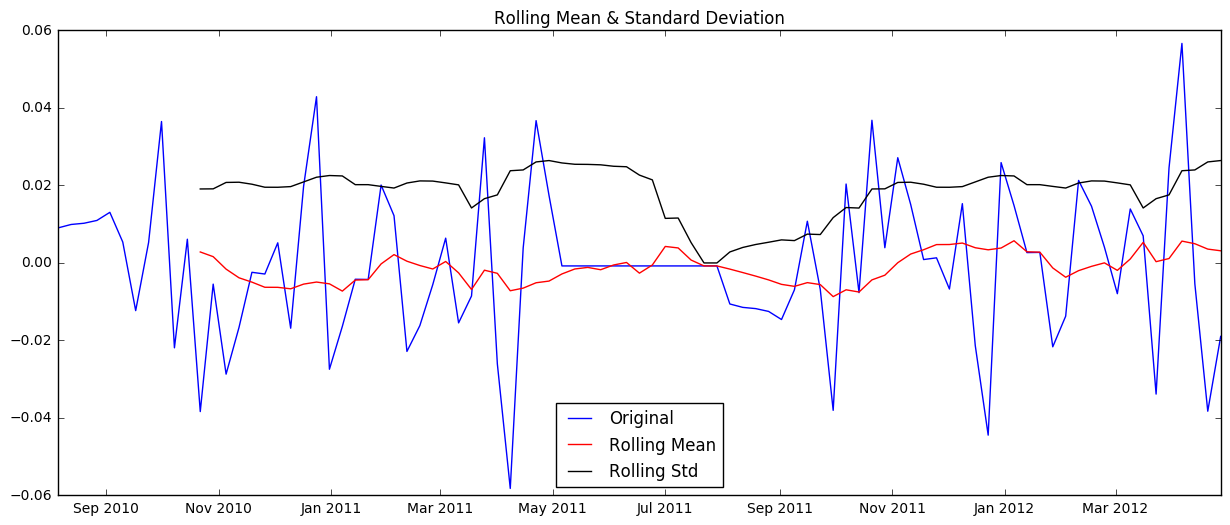

Results of Dickey-Fuller Test:
Test Statistic                -8.408962e+00
p-value                        2.129417e-13
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (5%)           -2.894607e+00
Critical Value (1%)           -3.506057e+00
Critical Value (10%)          -2.584410e+00
dtype: float64


In [31]:
# trend and seasonality above are separated frmo data and we can model the residuals. We will check the stationarity
#of residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. You can try advanced decomposition techniques as well which can generate better results. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.

In [34]:
ts_log_diff = ts_log - ts_log.shift()

### There are different techniques to forecast and we need to be careful with them and estimate: 
Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
#### However we will not do it here


### AR model - Autoregressive Model

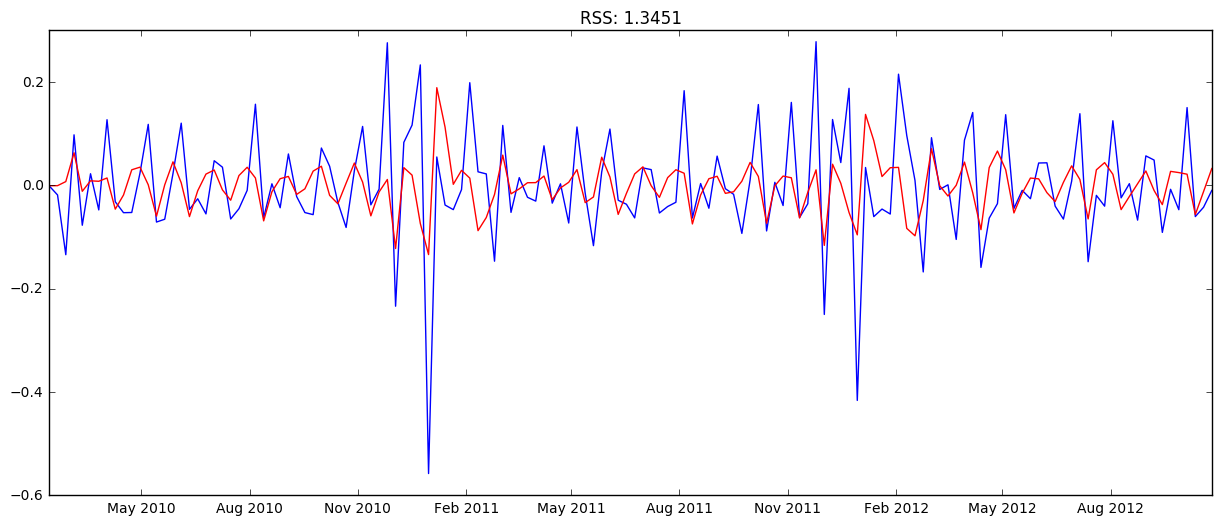

In [37]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA model - Moving average model

/Users/azizmamatov/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


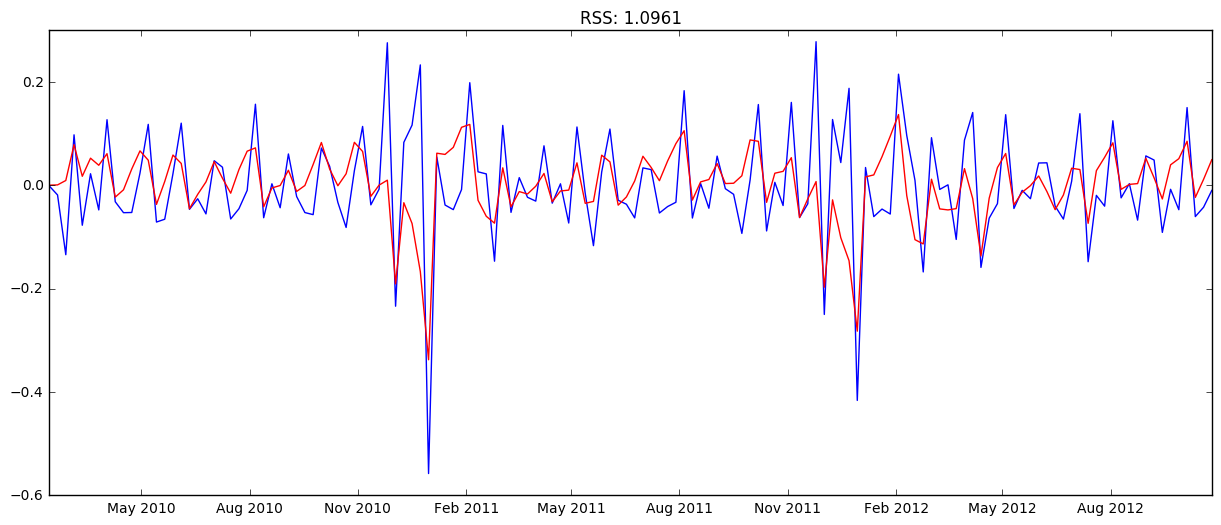

In [44]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Combined Model



/Users/azizmamatov/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


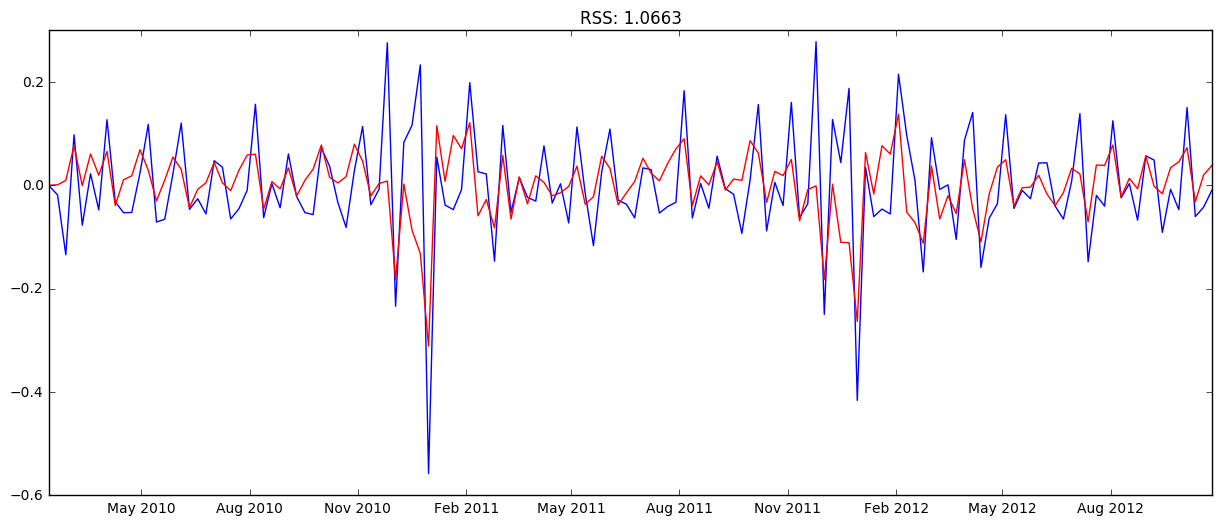

In [45]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


#### Now we need to take these value back to the original scale
Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.



In [47]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

2010-02-12    0.000498
2010-02-19    0.001117
2010-02-26    0.009777
2010-03-05    0.077008
2010-03-12   -0.000462
dtype: float64


### First week is missing as we took lag of 1
You can quickly do some back of mind calculations using previous output to check if these are correct. Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [49]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2010-02-12    0.000498
2010-02-19    0.001616
2010-02-26    0.011393
2010-03-05    0.088401
2010-03-12    0.087939
dtype: float64


2010-02-05    14.312455
2010-02-12    14.312953
2010-02-19    14.314070
2010-02-26    14.323848
2010-03-05    14.400856
dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.


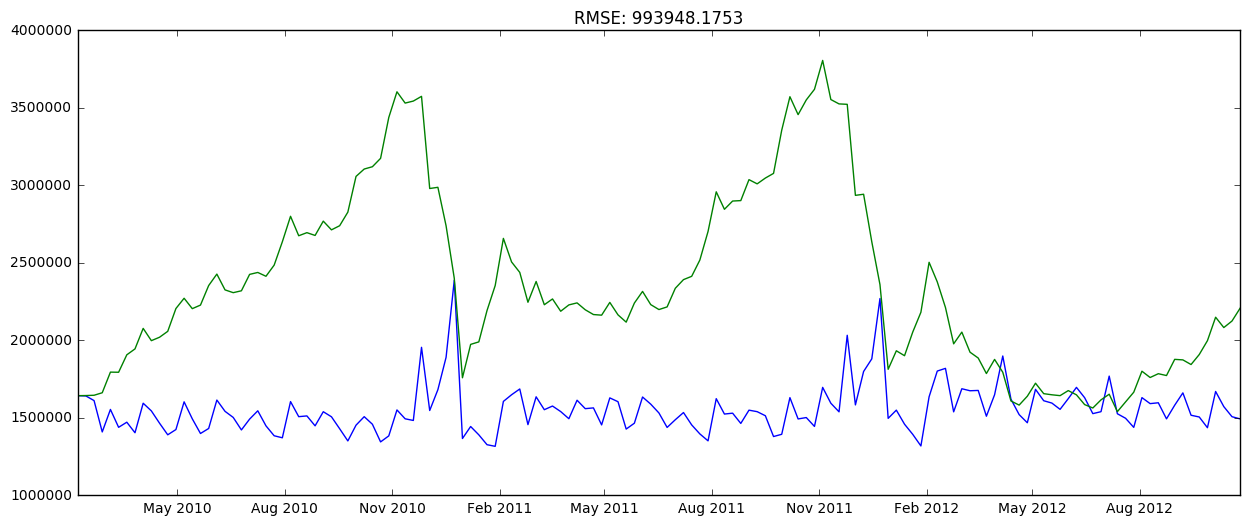

In [53]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts_store)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts_store)**2)/len(ts_store)))


### Connection with SQLite database should be stopped at the end of the session

In [54]:
cur.close()
conn.close()